# Data reading 

In [5]:
import os
import pandas as pd
import sns

# Define the root folder where the data is stored
root_folder = '../data'

# Initialize a dictionary to store data frames for each day
data_frames = {}

# Loop over the days (folders day_1 to day_6)
for n in range(1, 7):
    day_folder = os.path.join(root_folder, f'day_{n}')
    
    # Get the list of .csv files in the current day's folder
    csv_files = [f for f in os.listdir(day_folder) if f.endswith('.csv')]
    
    # Read each .csv file into a pandas DataFrame
    for file in csv_files:
        # Construct full file path
        file_path = os.path.join(day_folder, file)
        
        # Create a unique key for each data frame based on day and file name
        df_key = f'{file.split(" ")[0]}'
        
        # Read the csv and store in the dictionary
        content = pd.read_csv(file_path)
        df_value = content.drop('response_id ', axis=1)
        data_frames[df_key] = df_value
 

In [6]:
data_frames.keys()

dict_keys(['day_1_ripeness', 'day_1_taste', 'day_2_taste', 'day_2_ripeness', 'day_3_ripeness', 'day_3_taste', 'day_4_taste', 'day_4_ripeness', 'day_5_ripeness', 'day_5_taste', 'day_6_taste', 'day_6_ripeness'])

In [7]:
data_frames['day_1_ripeness']

,A,B,C,D
0,6,6,7,7
1,8,7,7,7
2,7,6,7,7
3,4,4,6,7
4,4,3,6,7
5,3,5,6,8
6,5,4,7,8
7,5,5,7,7
8,4,4,6,8
9,5,5,7,7


## Some visualizations for ripeness

In [8]:
# Initialize an empty dictionary to store the mean values for ripeness DataFrames
ripeness_means = {}

# Loop through the data_frames dictionary
for df_key, df in data_frames.items():
    # Check if the DataFrame name contains the word "ripeness"
    if "ripeness" in df_key:
        # Calculate the mean of each column in the DataFrame
        mean_values = df.mean(numeric_only=True)  # Only calculate for numeric columns
        
        # Store the mean values in the ripeness_means dictionary with the corresponding DataFrame key
        ripeness_means[df_key] = mean_values

# Now ripeness_means contains the mean values for every DataFrame with "ripeness" in its name


In [10]:
#ripeness_means['day_1_ripeness']

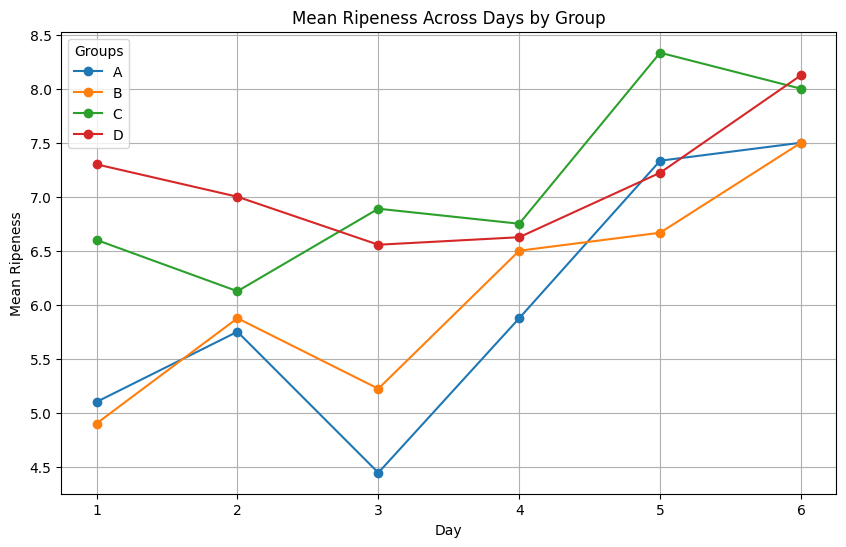

In [11]:
import matplotlib.pyplot as plt

# Create a list of days and groups based on the ripeness_means keys
days = sorted([int(key.split('_')[1]) for key in ripeness_means.keys()])
groups = ripeness_means[list(ripeness_means.keys())[0]].index  # Assuming the same groups across days

# Initialize a dictionary to store mean values for each group across days
group_means = {group: [] for group in groups}

# Populate the group_means dictionary with data from ripeness_means
for day in days:
    for group in groups:
        # Find the key for the current day and group
        key = f'day_{day}_ripeness'
        
        # Append the mean value for the current group to the group_means dictionary
        group_means[group].append(ripeness_means[key][group])

# Now plot the means for each group across days
plt.figure(figsize=(10, 6))

for group, means in group_means.items():
    plt.plot(days, means, marker='o', label=group)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Mean Ripeness')
plt.title('Mean Ripeness Across Days by Group')
plt.legend(title='Groups')
plt.grid(True)

# Show the plot
plt.show()


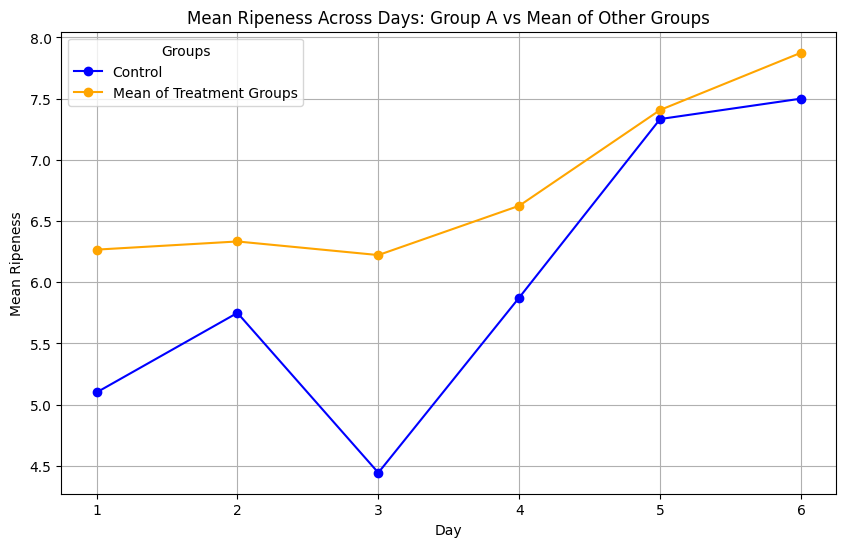

In [12]:
import matplotlib.pyplot as plt

# Create a list of days based on the ripeness_means keys
days = sorted([int(key.split('_')[1]) for key in ripeness_means.keys()])

# Define the groups
all_groups = ripeness_means[list(ripeness_means.keys())[0]].index  # Assuming the same groups across days
target_group = 'A'  # The group to isolate

# Initialize lists to store means for Group A and Mean of Other Groups
group_a_means = []
mean_other_groups = []

# Populate the lists with data from ripeness_means
for day in days:
    key = f'day_{day}_ripeness'
    
    # Append the mean value for Group A
    group_a_means.append(ripeness_means[key][target_group])
    
    # Calculate the mean of other groups (B, C, D)
    other_groups = [group for group in all_groups if group != target_group]
    mean_of_others = ripeness_means[key][other_groups].mean()
    mean_other_groups.append(mean_of_others)

# Now plot the means for Group A and Mean of Other Groups
plt.figure(figsize=(10, 6))

# Plot Group A
plt.plot(days, group_a_means, marker='o', label='Control', color='blue')

# Plot Mean of Other Groups
plt.plot(days, mean_other_groups, marker='o', label='Mean of Treatment Groups', color='orange')

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Mean Ripeness')
plt.title('Mean Ripeness Across Days: Group A vs Mean of Other Groups')
plt.legend(title='Groups')
plt.grid(True)

# Show the plot
plt.show()


In [13]:
# Initialize an empty dictionary to store the mean values for ripeness DataFrames
ripeness_data = {}

# Loop through the data_frames dictionary
for df_key, df in data_frames.items():
    # Check if the DataFrame name contains the word "ripeness"
    if "ripeness" in df_key:        
        # Store the mean values in the ripeness_means dictionary with the corresponding DataFrame key
        ripeness_data[df_key] = df


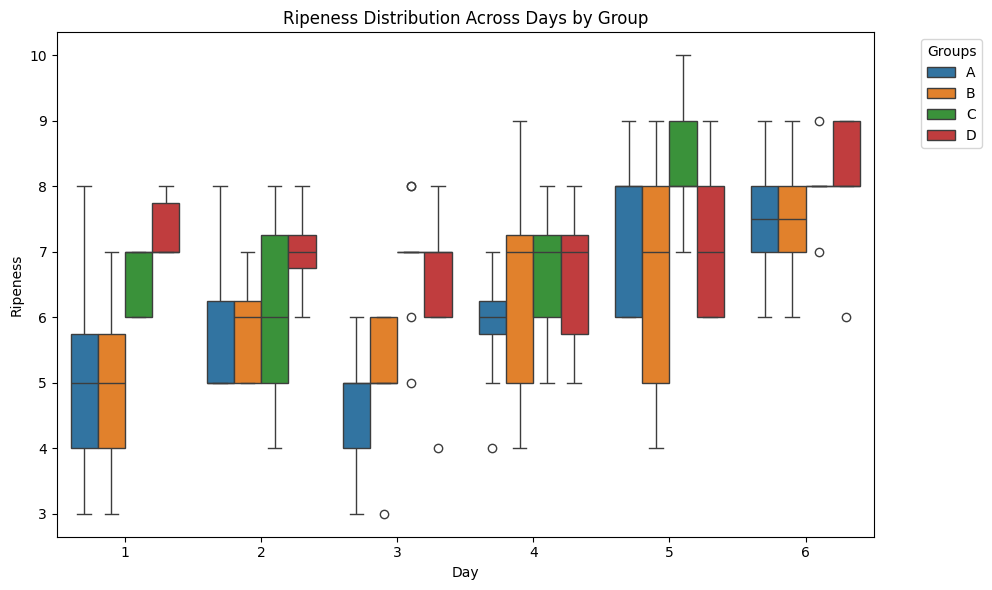

In [16]:
import seaborn as sns
data_for_boxplot = []

# Populate the data for each day and group
for day in days:
    for group in groups:
        key = f'day_{day}_ripeness'
        
        # Assuming ripeness_data[key] contains the actual ripeness values with variation
        values = ripeness_data[key][group]  # Extract the list of ripeness values for this day and group
        
        # Append each value along with its day and group to the list for the boxplot
        for value in values:
            data_for_boxplot.append({'Day': day, 'Group': group, 'Ripeness': value})

# Convert to a pandas DataFrame
df_boxplot = pd.DataFrame(data_for_boxplot)

# Create the boxplots using seaborn
plt.figure(figsize=(10, 6))

# Boxplot: hue represents different groups
sns.boxplot(x="Day", y="Ripeness", hue="Group", data=df_boxplot)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Ripeness')
plt.title('Ripeness Distribution Across Days by Group')
plt.legend(title='Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

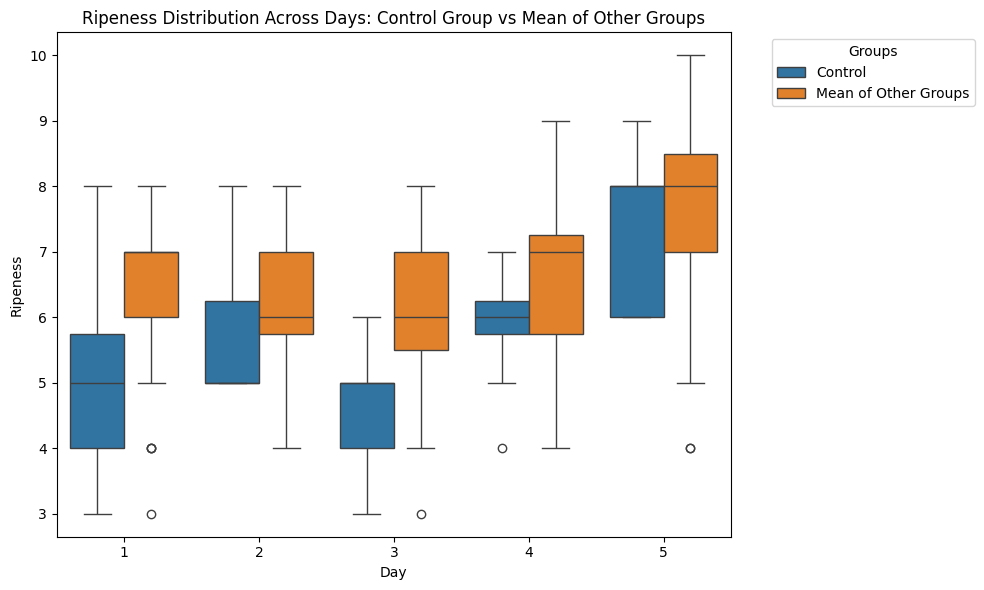

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Assuming ripeness_data contains the actual ripeness values with variation for each day and group
# ripeness_data[day][group] -> lists of ripeness values

# Define the groups
days = range(1, 6)  # Assuming days are from 1 to 5
all_groups = ['A', 'B', 'C', 'D']  # The original 4 groups
target_group = 'A'  # The group to isolate

# Initialize a list to collect ripeness values for the boxplot
data_for_boxplot = []

# Loop over each day to prepare the data
for day in days:
    for group in all_groups:
        key = f'day_{day}_ripeness'
        
        # Get the ripeness values for the current group and day
        values = ripeness_data[key][group]  # Extract the list of ripeness values
        
        # For Group A, we store values as is
        if group == target_group:
            for value in values:
                data_for_boxplot.append({'Day': day, 'Group': 'Control', 'Ripeness': value})
        else:
            # Collect values from other groups to calculate their mean later
            if group != target_group:
                # Store these values as part of the "Other Groups" collection for now
                for value in values:
                    data_for_boxplot.append({'Day': day, 'Group': 'Mean of Other Groups', 'Ripeness': value})

# Convert to a pandas DataFrame for boxplot visualization
df_boxplot = pd.DataFrame(data_for_boxplot)

# Create the boxplots using seaborn
plt.figure(figsize=(10, 6))

# Use seaborn to create a boxplot where "Day" is on the x-axis and "Ripeness" on the y-axis
sns.boxplot(x="Day", y="Ripeness", hue="Group", data=df_boxplot)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Ripeness')
plt.title('Ripeness Distribution Across Days: Control Group vs Mean of Other Groups')
plt.legend(title='Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Same visualizations but for Taste now 

In [18]:
# Initialize an empty dictionary to store the mean values for taste DataFrames
taste_means = {}

for df_key, df in data_frames.items():
    
    if "taste" in df_key:
        mean_values = df.mean(numeric_only=True)  
        taste_means[df_key] = mean_values



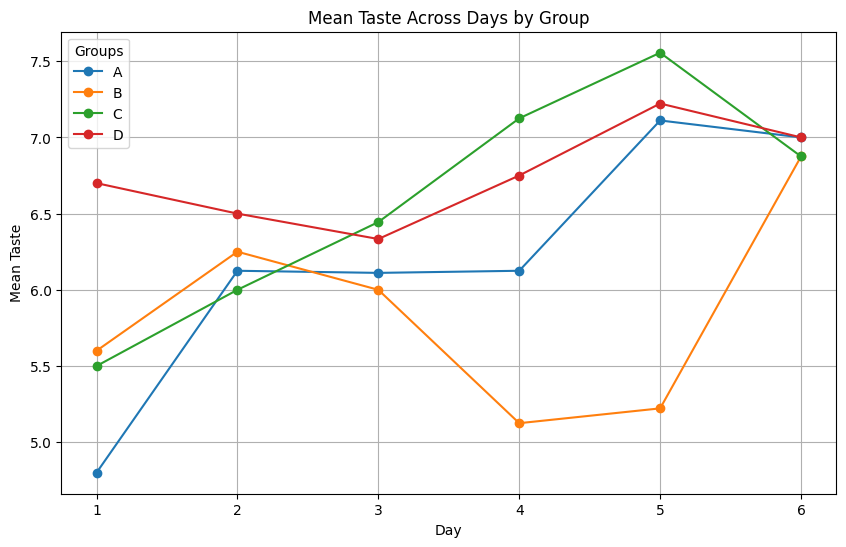

In [19]:
# Create a list of days and groups based on the ripeness_means keys
days = sorted([int(key.split('_')[1]) for key in taste_means.keys()])
groups = taste_means[list(taste_means.keys())[0]].index  # Assuming the same groups across days

# Initialize a dictionary to store mean values for each group across days
group_means = {group: [] for group in groups}

# Populate the group_means dictionary with data from ripeness_means
for day in days:
    for group in groups:
        # Find the key for the current day and group
        key = f'day_{day}_taste'
        
        # Append the mean value for the current group to the group_means dictionary
        group_means[group].append(taste_means[key][group])

# Now plot the means for each group across days
plt.figure(figsize=(10, 6))

for group, means in group_means.items():
    plt.plot(days, means, marker='o', label=group)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Mean Taste')
plt.title('Mean Taste Across Days by Group')
plt.legend(title='Groups')
plt.grid(True)

# Show the plot
plt.show()

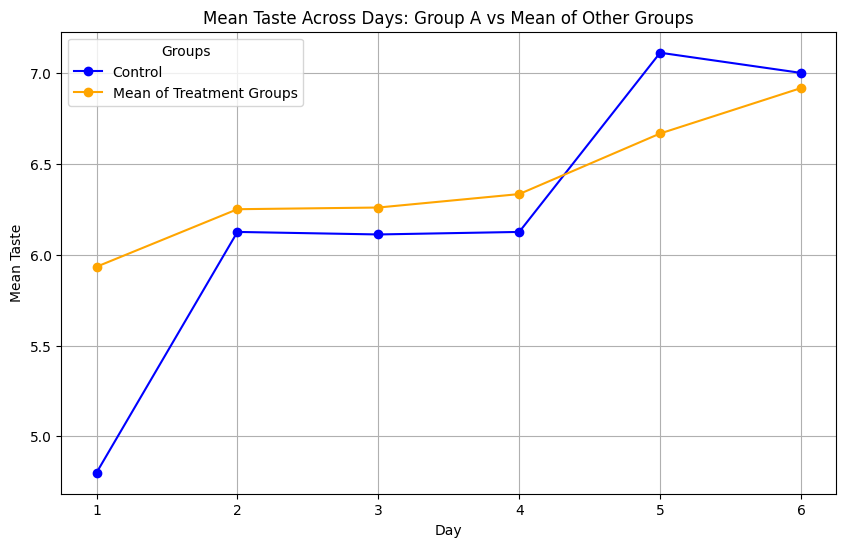

In [20]:
# Create a list of days based on the ripeness_means keys
days = sorted([int(key.split('_')[1]) for key in taste_means.keys()])

# Define the groups
all_groups = taste_means[list(taste_means.keys())[0]].index  # Assuming the same groups across days
target_group = 'A'  # The group to isolate

# Initialize lists to store means for Group A and Mean of Other Groups
group_a_means = []
mean_other_groups = []

# Populate the lists with data from ripeness_means
for day in days:
    key = f'day_{day}_taste'
    
    # Append the mean value for Group A
    group_a_means.append(taste_means[key][target_group])
    
    # Calculate the mean of other groups (B, C, D)
    other_groups = [group for group in all_groups if group != target_group]
    mean_of_others = taste_means[key][other_groups].mean()
    mean_other_groups.append(mean_of_others)

# Now plot the means for Group A and Mean of Other Groups
plt.figure(figsize=(10, 6))

# Plot Group A
plt.plot(days, group_a_means, marker='o', label='Control', color='blue')

# Plot Mean of Other Groups
plt.plot(days, mean_other_groups, marker='o', label='Mean of Treatment Groups', color='orange')

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Mean Taste')
plt.title('Mean Taste Across Days: Group A vs Mean of Other Groups')
plt.legend(title='Groups')
plt.grid(True)

# Show the plot
plt.show()

In [21]:
# Initialize an empty dictionary to store the mean values for taste DataFrames
taste_data = {}

# Loop through the data_frames dictionary
for df_key, df in data_frames.items():
    # Check if the DataFrame name contains the word "ripeness"
    if "taste" in df_key:        
        # Store the mean values in the ripeness_means dictionary with the corresponding DataFrame key
        taste_data[df_key] = df

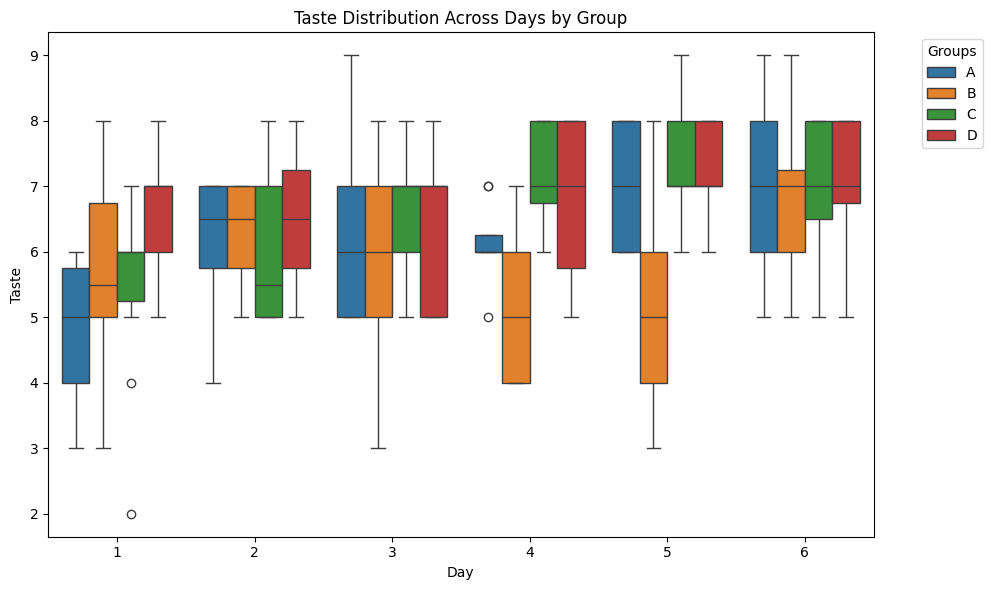

In [22]:
data_for_boxplot = []

# Populate the data for each day and group
for day in days:
    for group in groups:
        key = f'day_{day}_taste'
        
        # Assuming ripeness_data[key] contains the actual ripeness values with variation
        values = taste_data[key][group]  # Extract the list of ripeness values for this day and group
        
        # Append each value along with its day and group to the list for the boxplot
        for value in values:
            data_for_boxplot.append({'Day': day, 'Group': group, 'Taste': value})

# Convert to a pandas DataFrame
df_boxplot = pd.DataFrame(data_for_boxplot)

# Create the boxplots using seaborn
plt.figure(figsize=(10, 6))

# Boxplot: hue represents different groups
sns.boxplot(x="Day", y="Taste", hue="Group", data=df_boxplot)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Taste')
plt.title('Taste Distribution Across Days by Group')
plt.legend(title='Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

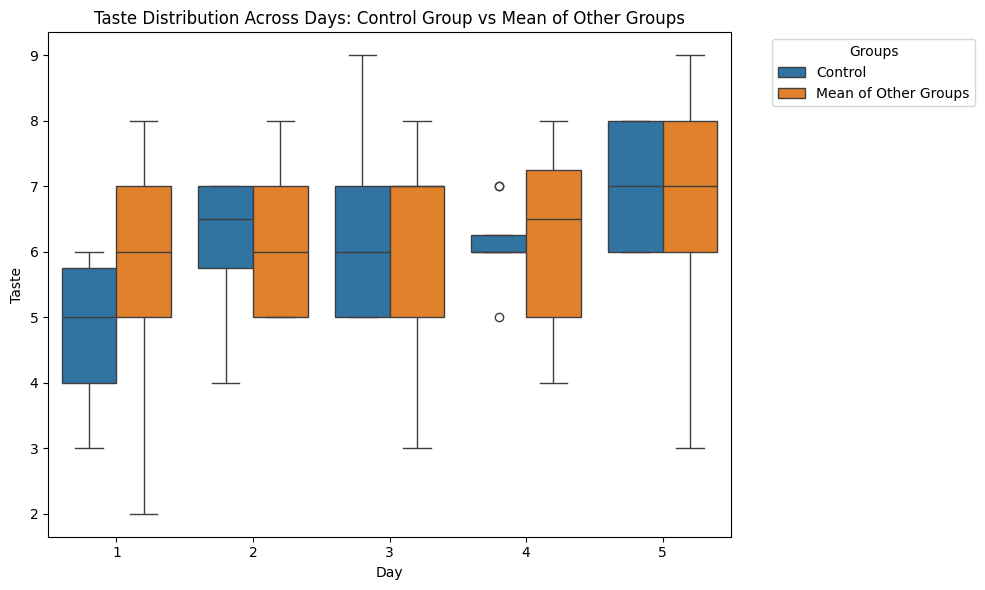

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Assuming ripeness_data contains the actual ripeness values with variation for each day and group
# ripeness_data[day][group] -> lists of ripeness values

# Define the groups
days = range(1, 6)  # Assuming days are from 1 to 5
all_groups = ['A', 'B', 'C', 'D']  # The original 4 groups
target_group = 'A'  # The group to isolate

# Initialize a list to collect ripeness values for the boxplot
data_for_boxplot = []

# Loop over each day to prepare the data
for day in days:
    for group in all_groups:
        key = f'day_{day}_taste'
        
        # Get the ripeness values for the current group and day
        values = taste_data[key][group]  # Extract the list of ripeness values
        
        # For Group A, we store values as is
        if group == target_group:
            for value in values:
                data_for_boxplot.append({'Day': day, 'Group': 'Control', 'Taste': value})
        else:
            # Collect values from other groups to calculate their mean later
            if group != target_group:
                # Store these values as part of the "Other Groups" collection for now
                for value in values:
                    data_for_boxplot.append({'Day': day, 'Group': 'Mean of Other Groups', 'Taste': value})

# Convert to a pandas DataFrame for boxplot visualization
df_boxplot = pd.DataFrame(data_for_boxplot)

# Create the boxplots using seaborn
plt.figure(figsize=(10, 6))

# Use seaborn to create a boxplot where "Day" is on the x-axis and "Ripeness" on the y-axis
sns.boxplot(x="Day", y="Taste", hue="Group", data=df_boxplot)

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Taste')
plt.title('Taste Distribution Across Days: Control Group vs Mean of Other Groups')
plt.legend(title='Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Hypothesis testing part 
## Naive approach
here we check the normality assumptions and use t-test or M-W test FOR EACH DAY 

### Hypothesis 1 The paper bag treatment impacts ripeness.  
*H_0:* The bag treatment does NOT impact ripeness (i.e., any difference in ripeness between groups is due to chance).
*H_1:* The bag treatment does impact ripeness (i.e., the difference in ripeness between groups is statistically significant).

In [133]:
# Function to run Shapiro-Wilk normality test
def sh_normality_test(data):
    stat, p_value = stats.shapiro(data)
    return stat, p_value

# Iterate over each day's data
for day_key in ripeness_data.keys():
    print(f"Results for {day_key}:")
    
    # Extract the ripeness data for the current day
    current_day_data = ripeness_data[day_key]
    
    # Perform the Shapiro-Wilk test for group A and group B
    stat_A, p_value_A = sh_normality_test(current_day_data['A'])
    stat_B, p_value_B = sh_normality_test(current_day_data['B'])
    
    # Print the test results
    print(f"Group A - Test Statistic: {stat_A}, P-value: {p_value_A}")
    if p_value_A > alpha:
        print("The data follows a normal distribution.")
    else:
        print("The data does NOT follow a normal distribution.")
    print(f"Group B - Test Statistic: {stat_B}, P-value: {p_value_B}")
    if p_value_B > alpha:
        print("The data follows a normal distribution.")
    else:
        print("The data does NOT follow a normal distribution.")
    # If p-values > 0.05, normality is assumed; otherwise, use non-parametric tests
    if p_value_A > 0.05 and p_value_B > 0.05:
        # Perform t-test
        t_stat, t_p_value = stats.ttest_ind(current_day_data['A'], current_day_data['B'], equal_var=False)  # Set equal_var=True if variances are similar
        print(f"T-test p-value: {t_p_value}")
    else:
        # Perform Mann-Whitney U test
        u_stat, u_p_value = stats.mannwhitneyu(current_day_data['A'], current_day_data['B'])
        print(f"Mann-Whitney U-test p-value: {u_p_value}")
    if (t_p_value <= 0.05) or (u_p_value <= 0.05):
        print(f" We have enough evidance to reject the null hypothesis on 0.05 significant level, which suggests that the bag treatment does NOT significantly impact ripeness.")
    print('-' * 50)

Results for day_1_ripeness:
Group A - Test Statistic: 0.929253876209259, P-value: 0.4405936300754547
The data follows a normal distribution.
Group B - Test Statistic: 0.9519404172897339, P-value: 0.6914888024330139
The data follows a normal distribution.
T-test p-value: 0.7481272259084623
--------------------------------------------------
Results for day_2_ripeness:
Group A - Test Statistic: 0.7241675853729248, P-value: 0.0042136418633162975
The data does NOT follow a normal distribution.
Group B - Test Statistic: 0.8352138996124268, P-value: 0.06723642349243164
The data follows a normal distribution.
Mann-Whitney U-test p-value: 0.6094657688943073
--------------------------------------------------
Results for day_3_ripeness:
Group A - Test Statistic: 0.8917765021324158, P-value: 0.20807792246341705
The data follows a normal distribution.
Group B - Test Statistic: 0.751937985420227, P-value: 0.005709535907953978
The data does NOT follow a normal distribution.
Mann-Whitney U-test p-valu

Nothing here, all p-values are to big. 

### Hypothesis 2 Baking the bananas for 5 minutes at 300 degrees impacts ripeness.

In [134]:
# Iterate over each day's data
for day_key in ripeness_data.keys():
    print(f"Results for {day_key}:")
    
    # Extract the ripeness data for the current day
    current_day_data = ripeness_data[day_key]
    
    # Perform the Shapiro-Wilk test for group A and group B
    stat_A, p_value_A = sh_normality_test(current_day_data['A'])
    stat_C, p_value_C = sh_normality_test(current_day_data['C'])
    
    # Print the test results
    print(f"Group A - Test Statistic: {stat_A}, P-value: {p_value_A}")
    if p_value_A > alpha:
        print("The data follows a normal distribution.")
    else:
        print("The data does NOT follow a normal distribution.")
    print(f"Group C - Test Statistic: {stat_C}, P-value: {p_value_C}")
    if p_value_C > alpha:
        print("The data follows a normal distribution.")
    else:
        print("The data does NOT follow a normal distribution.")
    # If p-values > 0.05, normality is assumed; otherwise, use non-parametric tests
    if p_value_A > 0.05 and p_value_C > 0.05:
        # Perform t-test
        t_stat, t_p_value = stats.ttest_ind(current_day_data['A'], current_day_data['C'], equal_var=False)  # Set equal_var=True if variances are similar
        print(f"T-test p-value: {t_p_value}")
    else:
        # Perform Mann-Whitney U test
        u_stat, u_p_value = stats.mannwhitneyu(current_day_data['A'], current_day_data['C'])
        print(f"Mann-Whitney U-test p-value: {u_p_value}")
    if (t_p_value < 0.05) or (u_p_value < 0.05):
        print(f"We have enough evidance to reject the null hypothesis on 0.05 significant level, which suggests that the oven treatment does NOT significantly impact ripeness.")
    print('-' * 50)

Results for day_1_ripeness:
Group A - Test Statistic: 0.929253876209259, P-value: 0.4405936300754547
The data follows a normal distribution.
Group C - Test Statistic: 0.640485405921936, P-value: 0.00016868000966496766
The data does NOT follow a normal distribution.
Mann-Whitney U-test p-value: 0.017217395363837748
We have enough evidance to reject the null hypothesis on 0.05 significant level, which suggests that the oven treatment does NOT significantly impact ripeness.
--------------------------------------------------
Results for day_2_ripeness:
Group A - Test Statistic: 0.7241675853729248, P-value: 0.0042136418633162975
The data does NOT follow a normal distribution.
Group C - Test Statistic: 0.9299981594085693, P-value: 0.5160583257675171
The data follows a normal distribution.
Mann-Whitney U-test p-value: 0.5808403603117523
--------------------------------------------------
Results for day_3_ripeness:
Group A - Test Statistic: 0.8917765021324158, P-value: 0.20807792246341705
The 

### Hypothesis 3
*H_0:* There is no interaction effect between the two treatments (i.e., the effect of one treatment does not depend on the presence or absence of the other).

*H_1:* There is an interaction effect between the two treatments (i.e., the effect of one treatment depends on whether the other treatment is applied).